<a href="https://colab.research.google.com/github/OVP2023/NN/blob/main/Digit_Recognizer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Digit Recognizer
#https://www.kaggle.com/c/digit-recognizer


import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf


train = np.loadtxt('/content/drive/MyDrive/Datasets/CV/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('/content/drive/MyDrive/Datasets/CV/digit/test.csv', delimiter=',', skiprows=1)

# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))


In [3]:
train_img.shape

(42000, 28, 28)

In [4]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

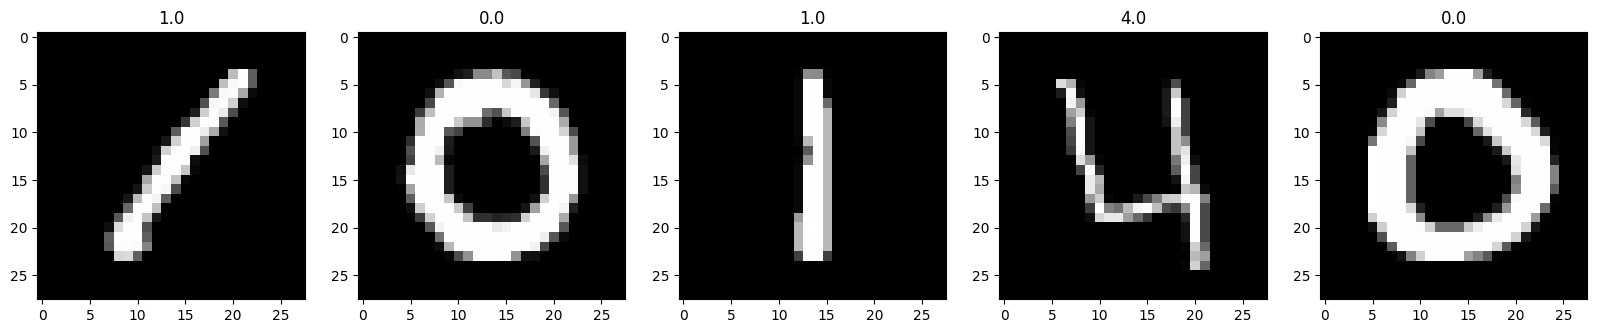

In [5]:
#Визуализируем исходные данные

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [8]:
#Разбиваем выборку на обучение и валидацию
from sklearn.model_selection import train_test_split

y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

In [9]:
#Собираем сверточную сеть для обучения
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,022 (109.46 KB)

 Trainable params: 28,022 (109.46 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Собираем сверточную сеть для обучения
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=3,
                           kernel_size=(11, 11),
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Conv2D(filters=48,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Conv2D(filters=192,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 3)           │             366 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 48)          │           3,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         110,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 3, 3, 192)           │         442,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 1, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 563,928 (2.15 MB)

 Trainable params: 563,928 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#One-hot кодировка разметки
y_train_labels = tf.keras.utils.to_categorical(y_train)
print(y_train.shape)
print(y_train_labels.shape)

(33600,)
(33600, 10)


In [14]:
#Запускаем обучение model

model.fit(x_train,
          y_train_labels,
          batch_size=32,
          epochs=5,
          validation_split=0.2)

Epoch 1/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.6516 - loss: 2.0533 - val_accuracy: 0.9432 - val_loss: 0.2095
Epoch 2/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.9505 - loss: 0.1674 - val_accuracy: 0.9606 - val_loss: 0.1431
Epoch 3/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9717 - loss: 0.0862 - val_accuracy: 0.9656 - val_loss: 0.1252
Epoch 4/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9801 - loss: 0.0610 - val_accuracy: 0.9722 - val_loss: 0.1073
Epoch 5/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9762 - val_loss: 0.0944


In [32]:
#Запускаем обучение model2

model2.fit(x_train,
          y_train_labels,
          batch_size=32,
          epochs=5,
          validation_split=0.2)

Epoch 1/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 127s 148ms/step - accuracy: 0.6835 - loss: 1.8575 - val_accuracy: 0.9607 - val_loss: 0.1537
Epoch 2/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 141s 148ms/step - accuracy: 0.9650 - loss: 0.1188 - val_accuracy: 0.9743 - val_loss: 0.1038
Epoch 3/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 141s 147ms/step - accuracy: 0.9801 - loss: 0.0694 - val_accuracy: 0.9769 - val_loss: 0.0962
Epoch 4/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 142s 147ms/step - accuracy: 0.9842 - loss: 0.0570 - val_accuracy: 0.9778 - val_loss: 0.0912
Epoch 5/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 140s 145ms/step - accuracy: 0.9852 - loss: 0.0497 - val_accuracy: 0.9738 - val_loss: 0.1116


In [15]:
#Предсказываем класс объекта

y_pred = model.predict(x_val)
y_pred_labels = np.argmax(y_pred, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [16]:
#Оцениваем качество решение на валидационной выборке

from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, y_pred_labels))

Accuracy: 0.9777380952380952


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       816
         1.0       0.99      0.99      0.99       909
         2.0       0.98      0.98      0.98       846
         3.0       0.97      0.98      0.98       937
         4.0       0.97      0.98      0.98       839
         5.0       0.97      0.98      0.98       702
         6.0       0.99      0.98      0.98       785
         7.0       0.99      0.98      0.98       893
         8.0       0.96      0.97      0.96       835
         9.0       0.97      0.95      0.96       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_labels))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       816
         1.0       0.99      0.99      0.99       909
         2.0       0.98      0.98      0.98       846
         3.0       0.97      0.98      0.98       937
         4.0       0.97      0.98      0.98       839
         5.0       0.97      0.98      0.98       702
         6.0       0.99      0.98      0.98       785
         7.0       0.99      0.98      0.98       893
         8.0       0.96      0.97      0.96       835
         9.0       0.97      0.95      0.96       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [33]:
#Для модели 2 AlexNetForever
y_pred2 = model2.predict(x_val)
y_pred_labels2 = np.argmax(y_pred2, axis=1)
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, y_pred_labels2))


263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step
Accuracy: 0.9764285714285714


In [34]:
print(classification_report(y_val, y_pred_labels2))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       816
         1.0       0.97      1.00      0.98       909
         2.0       0.99      0.97      0.98       846
         3.0       1.00      0.96      0.98       937
         4.0       0.97      0.98      0.98       839
         5.0       0.97      0.97      0.97       702
         6.0       0.96      0.99      0.97       785
         7.0       0.95      0.99      0.97       893
         8.0       0.99      0.95      0.97       835
         9.0       0.99      0.96      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [35]:
#Визуализируем предсказания для тестовой выборки

y_pred_test = model2.predict(test_img)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step


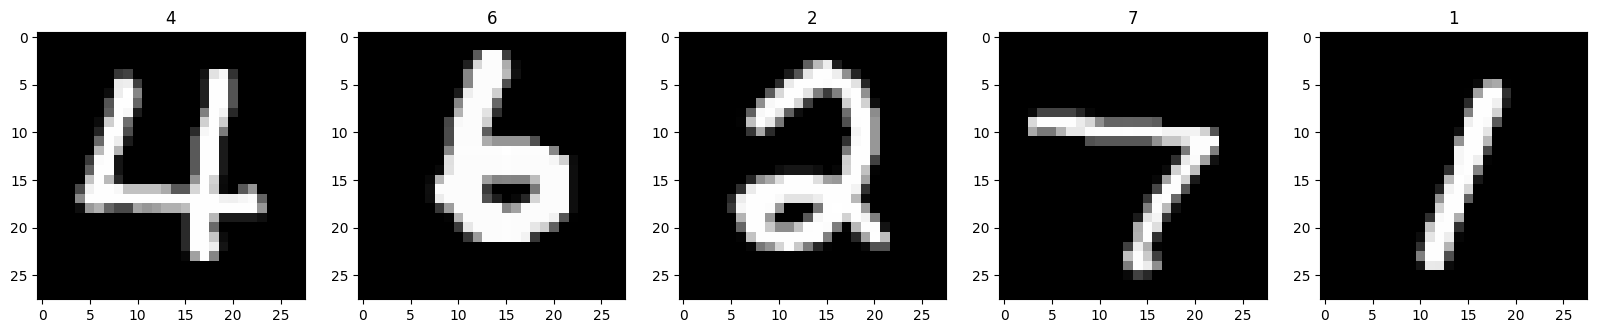

In [36]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], y_pred_test_labels[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

In [37]:
#Готовим файл для отправки

with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred_test_labels, 1):
        dst.write('%s,%d\n' % (i, p))

In [38]:
!head submit.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0
